# Métodos de bisección y Newton


### Ejercicio 2. Dada la función $f(x)=e^x-e^{-x}-x^3+1$ se pide:
 
### a. Localiza y separa gráficamente todas las soluciones de la ecuación $f(x)=0$ en intervalos de anchura $0.5$.

### b. Realiza manualmente dos pasos del método de bisección para aproximar la raíz que está más cerca de $x=0$.

### c. Calcula aproximadamente todas las raíces positivas de la ecuación mediante el método de bisección, con error absoluto menor que $10^{-8}$.

### d. Utiliza el comando  *find_root*  para hallar las soluciones positivas de la ecuación y compara las soluciones obtenidas con las del apartado (c).

SOLUCIÓN:

### a. Localiza y separa gráficamente todas las soluciones de la ecuación $f(x)=0$ en intervalos de anchura $0.5$.
### d. Utiliza el comando  *find_root*  para hallar las soluciones positivas de la ecuación.

Para realizar este apartado debemos dibujar la gráfica y observar directamente las raíces. En este caso, la función $f$ no tiene asíntotas verticales por lo que no es necesario una preparación previa.

In [2]:
f(x)= exp(x)-exp(-x)-x^3+1 
show(f(x))

-x^3 - e^(-x) + e^x + 1

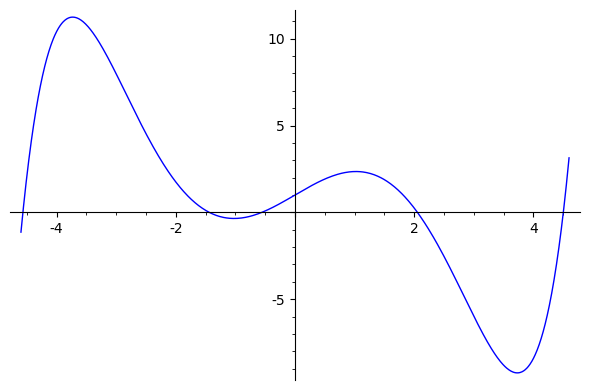

In [3]:
plot(f,-4.6,4.6)

Observamos 5 raíces en la gráfica y las vamos a calcular con SAGE dando a la vez un intervalo de anchura 0.5. 

In [4]:
find_root(f,-5,-4.5)

-4.567345052205097

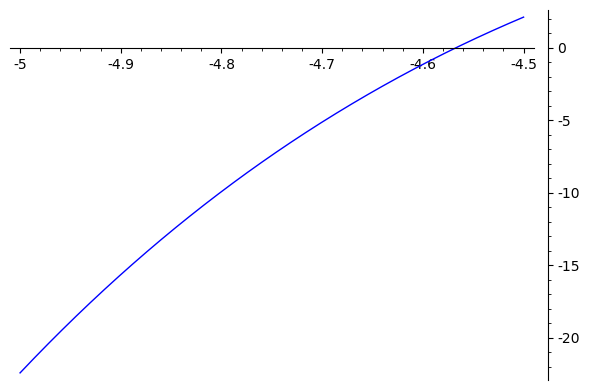

In [5]:
plot(f,-5,-4.5) 
#La representación cercana a la solución -4.5 y de intervalo (-5,-4.5)

In [6]:
find_root(f,4.1,4.6) #Esta solución nos la piden en el apartado d)

4.504046043991592

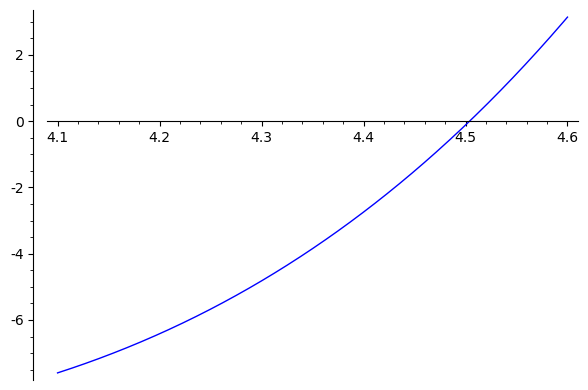

In [7]:
plot(f,4.1,4.6) 
#La representación cercana a la solución 4.5 y de intervalo (4.1,4.6)

In [8]:
find_root(f,2,2.5) #Esta solución nos la piden en el apartado d)

2.0550905428661803

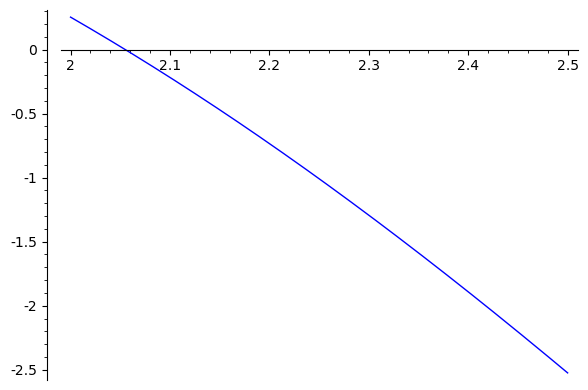

In [9]:
plot(f,2,2.5) 
#La representación cercana a la solución 2 y de intervalo (2,2.5)

In [10]:
find_root(f,-1.5,-1)

-1.4387411181880254

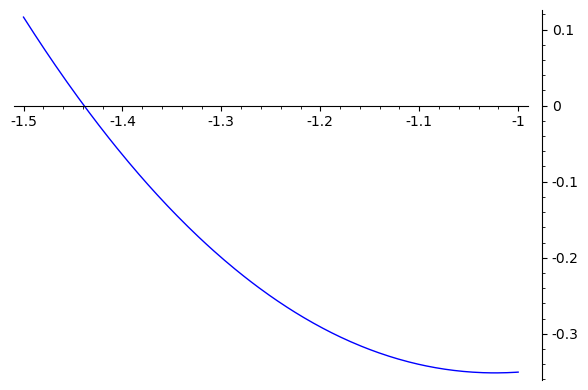

In [11]:
plot(f,-1.5,-1) 
#La representación cercana a la solución -1.4 y de intervalo (-1.5,-1)

In [12]:
find_root(f,-1,-0.5) # Ésta es la que hay que calcular en el paso b)

-0.5572202762229479

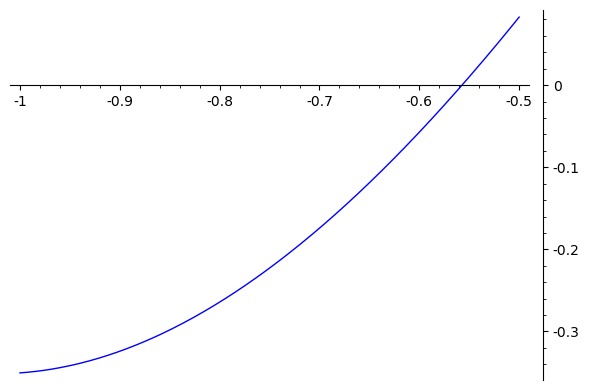

In [13]:
plot(f,-1,-0.5) 
#La representación cercana a la solución -0.5 y de intervalo (-1,-0.5)

### b. Realiza manualmente dos pasos del método de bisección para aproximar la raíz que está más cerca de $x=0$.

Para realizar este apartado recordemos teóricamente en que consiste el método de bisección.

## Método de bisección

El método de bisección se basa en el siguiente resultado:

### Teorema de Bolzano y de unicidad de raíces.-

Si $f$ es una función continua en un intervalo $[a,b]$ y que cumple $f(a)·f(b)<0$ entonces,

existe $c$ en el intervalo $(a,b)$ de forma que $f(c) = 0$.

Si además, la función es creciente o decreciente en dicho intervalo $c$ es único.

Tal y cómo nos indica la palabra bisección suponemos en un primer paso que el valor $c$ es el punto intermedio del intervalo $[a,b]$. Veamos en nuestro caso particular como se realiza.

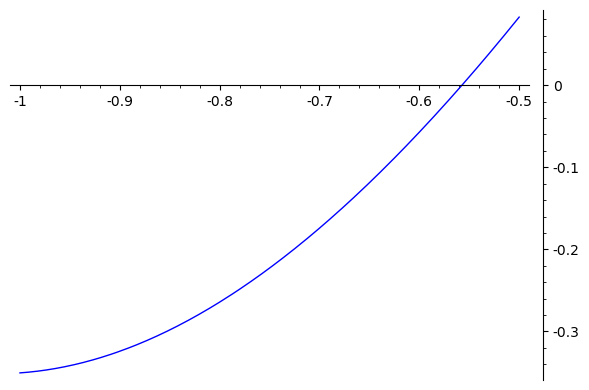

In [14]:
plot(f,-1,-0.5)

In [15]:
#calculamos el punto medio del intervalo inicial [a,b]=[-1,-0.5]
a=-1
b=-0.5
a0=a
b0=b
c0=(a0+b0)/2;c0

-0.750000000000000

In [16]:
f(a0),f(c0),f(b0)

(-e + e^(-1) + 2, -0.222758463871660, 0.0828093890125052)

In [17]:
#Necesitamos averiguar el signo de cada uno de los valores. 
#Lo hacemos añadiendo .n()
f(a0).n(),f(c0),f(b0)

(-0.350402387287603, -0.222758463871660, 0.0828093890125052)

In [18]:
a1=c0
b1=b0
c1=(a1+b1)/2;c1

-0.625000000000000

In [19]:
f(a1).n(),f(c1),f(b1)

(-0.222758463871660, -0.0888439039132320, 0.0828093890125052)

In [20]:
a2=c1
b2=b1
c2=(a2+b2)/2;c2

-0.562500000000000

In [21]:
f(c2)#aun un poco lejos de 0.

-0.00729331660437549

### c. Calcula aproximadamente todas las raíces positivas de la ecuación mediante el método de bisección, con error absoluto menor que $10^{-8}$.

### d. Utiliza el comando  *find_root*  para hallar las soluciones positivas de la ecuación y compara las soluciones obtenidas con las del apartado (c).
 

Para realizar este apartado recordemos teóricamente como se acota el error en el método de bisección.

## Método de bisección y su acotación del ERROR

Observamos que si una ecuación $f(x)=0$ tiene una raíz en el intervalo $(a,b)$. 
El número $N$ de pasos del método de bisección que tenemos que dar para alcanzar la precisión deseada debe cumplir
$$N>\dfrac{\log\left(\frac{b-a}{\varepsilon}\right)}{\log 2}-1$$
<p>donde $[a,b]$ es el intervalo inicial y $\varepsilon$ es el error permitido.</p>
<p style="text-align: left;">Entonces, calculamos el número de pasos en nuestro caso particular:</p>

Calculamos la raíz del $[a,b]=[-1,-0.5]$

In [22]:
a=-1
b=-0.5

In [23]:
epsilon=10^(-8)
numerical_approx(log((b-a)/epsilon)/log(2)-1)

24.5754247590989

In [24]:
N=25
N

25

In [25]:
contador=0
N=25
a0=a
b0=b
c0=(b0+a0)/2
while not f(c0)==0 and contador<N:
    if f(a0)*f(c0)<0:
        b0=c0
        c0=(b0+a0)/2  
    else:
        a0=c0
        c0=(b0+a0)/2
    contador=contador+1
c0

-0.557220272719860

In [26]:
contador

25

In [27]:
c0-find_root(f,a,b)<epsilon 
#hemos calculado la raíz más cercana a 0 con un error menor del indicado.

True

Calculamos la raíz del $[a,b]=[2,2.5]$

In [28]:
a=2
b=2.5
epsilon=10^(-8)
numerical_approx(log((b-a)/epsilon)/log(2)-1)

24.5754247590989

In [29]:
contador=0
N=25
a0=a
b0=b
c0=(b0+a0)/2
while not f(c0)==0 and contador<N:
    if f(a0)*f(c0)<0:
        b0=c0
        c0=(b0+a0)/2  
    else:
        a0=c0
        c0=(b0+a0)/2
    contador=contador+1
c0

2.05509053915739

In [30]:
show(contador)
c0-find_root(f,a,b)<epsilon 

25

True

Calculamos la raíz del $[a,b]=[4.1,4.6]$

In [31]:
a=4.1
b=4.6
epsilon=10^(-8)
numerical_approx(log((b-a)/epsilon)/log(2)-1)

24.5754247590989

In [32]:
contador=0
N=25
a0=a
b0=b
c0=(b0+a0)/2
while not f(c0)==0 and contador<N:
    if f(a0)*f(c0)<0:
        b0=c0
        c0=(b0+a0)/2  
    else:
        a0=c0
        c0=(b0+a0)/2
    contador=contador+1
c0

4.50404605120420

In [33]:
show(contador)
abs(c0-find_root(f,a,b))<epsilon 

25

True

Hay que terminar el ejercicio para las dos raíces que nos faltan. Es decir las que se encuentran en los intervalos $[-4.5,-4]$ y $[-2,-2.5]$. Termina el ejercicio por ti mismo.